В этом задании мы будем использовать данные SOCR по росту и весу 25 тысяч подростков.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

[1] Считаем данные по росту и весу (weights_heights.csv, приложенный в задании) в объект DataFrame:

In [3]:
df = pd.read_excel('weights_heights.csv', index_col='Index')
df.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


[2] Постройте 2 раздельные гистограммы распределения роста и веса подростков из выборки data. Выделите параметры разным цветом и подпишите оси.

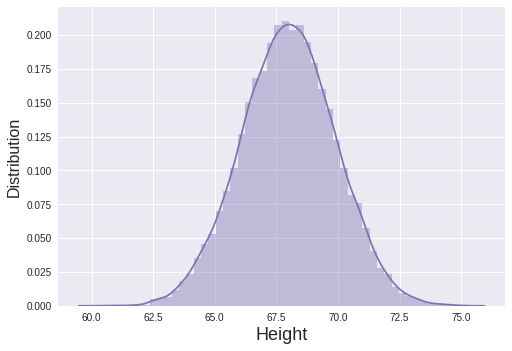

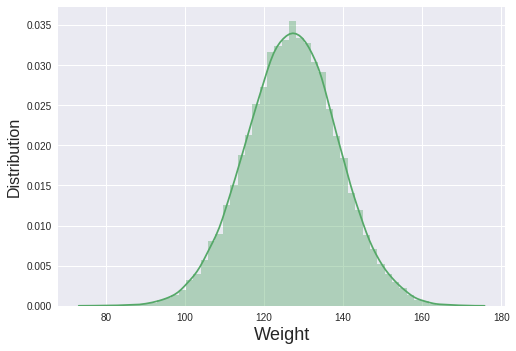

In [4]:
sns.distplot(df['Height'], color="m")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Height', fontsize=18)
plt.show()
sns.distplot(df['Weight'], color="g")
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
plt.show()



[3.1] Добавьте третий признак ('BMI'). Создайте признак Индекс массы тела (BMI). Для этого воспользуйтесь коэффициентами перевода единиц с точностью до 5 знака после запятой.

In [5]:
df['BMI'] = (df['Weight'] * 703) / pow(df['Height'], 2)

[3.2] Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга.

In [6]:
df.corr()

,Height,Weight,BMI
Height,1.000000,0.502859,-0.121519
Weight,0.502859,1.000000,0.795477
BMI,-0.121519,0.795477,1.000000


[4]. Создайте в DataFrame data новый признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте boxplot, демонстрирующий зависимость роста от весовой категории. Подпишите ось y меткой «Рост», ось x – меткой «Весовая категория».

In [7]:
def weight_category_calculation(weight):
    if weight < 120:
        return 1
    elif weight > 150:
        return 3
    else: return 2
df['weight_category'] = df['Weight'].apply(weight_category_calculation)

[5]. Постройте scatter plot зависимости роста от веса. Подпишите картинку.

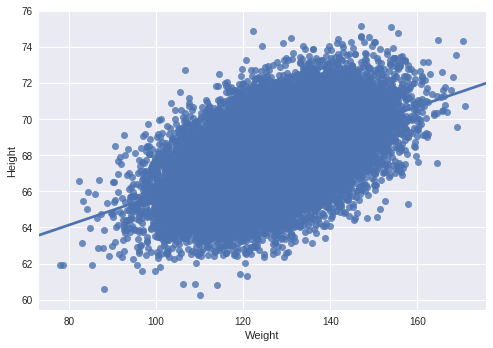

In [8]:
sns.regplot(df['Weight'], df['Height'])
plt.show()

### Минимизация квадратичной ошибки

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [10]:
grid_search_data = {
    'linearregression': {
        'model': LinearRegression(),
        'params': {}
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'],
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'precompute': [True, False],
            'warm_start': [True, False],
            'normalize': [True, False],
            'alpha': [i*0.1 for i in range(2, 5)]
        }
    }
}

for key in grid_search_data.keys():
    model = grid_search_data[key]['model']
    params = grid_search_data[key]['params']
    
    clf = GridSearchCV(model, params, n_jobs=-1, scoring='neg_mean_squared_error')
    clf.fit(df['Weight'].values.reshape(-1, 1), df['Height'])
    
    print('===========', key, '==========')
    print('best estimator:',clf.best_estimator_)
    print('score:', clf.best_score_)

=========== ridge ==========
best estimator: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
score: -2.70359874627
=========== lasso ==========
best estimator: Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=True)
score: -2.70387562728
=========== linearregression ==========
best estimator: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
score: -2.70359874714
